## Financial Risk Analysis in Python - Apple and S&P 500

#### The Scenario: 

ABC company is about to buy shares in Apple and S&P 500 with the target to obtain optimum profit in the space of two years. But they are curious how the two companies have been performing for the past three years.

So, the manager approaches you as the Data Analyst in the ABC company; please can we know how the Apple and S&P 500 stock market have been for the past three years? We would like to know if the risk is minimal or unaffordable for us.

*This is a real scenario!*

In Python, we can use libraries such as pandas for data manipulation, yfinance for fetching historical stock prices, and matplotlib for visualization. For more advanced financial analysis, we can use numpy for mathematical operations and pyfolio for performance analysis. Make sure to install these packages if you haven't already:

Now, let's import the libraries

In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pyfolio
%matplotlib inline

In [3]:
# Step 1: Get Historical Stock Prices
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 2: Calculate Daily Returns
data["Returns"] = data["Adj Close"].pct_change()

data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000,-0.004703
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,0.016086


In [5]:
# Step 3: Calculate Volatility
volatility = np.std(data["Returns"])

volatility

0.02113539691705861

In [6]:
# Step 4: Calculate Beta
market_data = yf.download("^GSPC", start=start_date, end=end_date)
data = data.join(market_data["Adj Close"], on=data.index, rsuffix="_Market")
data["Returns_Market"] = data["Adj Close_Market"].pct_change()

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,NaN,3257.850098,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,-0.009722,3234.850098,-0.007060
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200,0.007968,3246.280029,0.003533
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000,-0.004703,3237.179932,-0.002803
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,0.016086,3253.050049,0.004902


In [7]:
cov_matrix = np.cov(data["Returns"].dropna(), data["Returns_Market"].dropna())
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

beta

1.189676941768342

In [8]:
# Step 5: Calculate Sharpe Ratio
sharpe_ratio = data["Returns"].mean() / volatility

sharpe_ratio

0.056141230819011914

In [12]:
# Weekly and monthly returns
data['Week_Returns'] = data["Returns"].rolling(7).mean()

data['Month_Returns'] = data["Returns"].rolling(30).mean()

data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market,Week_Returns,Month_Returns
Date,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,NaN,3257.850098,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,-0.009722,3234.850098,-0.007060,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200,0.007968,3246.280029,0.003533,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000,-0.004703,3237.179932,-0.002803,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,0.016086,3253.050049,0.004902,NaN,NaN


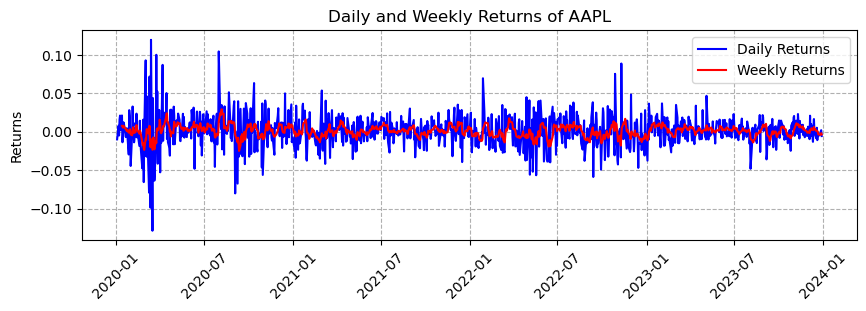

In [13]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))

# Plotting Returns
plt.subplot(2, 1, 1)
plt.plot(data.index, data["Returns"], label="Daily Returns", color="blue")
plt.plot(data.index, data["Week_Returns"], label="Weekly Returns", color="red")
plt.title("Daily and Weekly Returns of {}".format(symbol))
plt.ylabel("Returns")
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.legend()

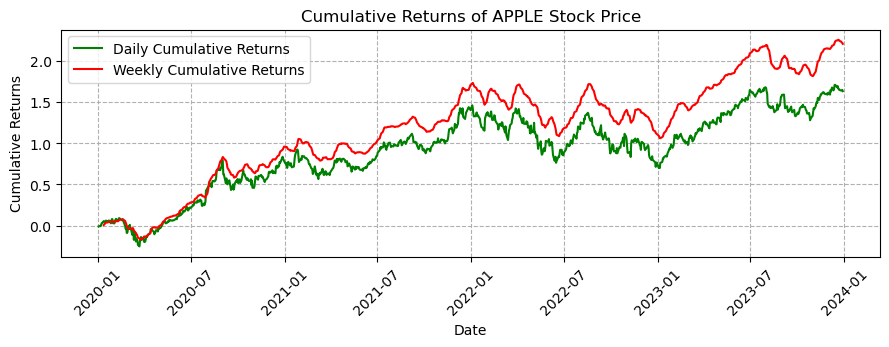

In [39]:
# Plotting Cumulative Returns
plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 2)
cumulative_returns = (1 + data["Returns"]).cumprod() - 1
cumulative_returns_w = (1 + data["Week_Returns"]).cumprod() - 1
cumulative_returns_m = (1 + data["Month_Returns"]).cumprod() - 1
plt.plot(data.index, cumulative_returns, label="Daily Cumulative Returns", color="green")
plt.plot(data.index, cumulative_returns_w, label="Weekly Cumulative Returns", color="red")
#plt.plot(data.index, cumulative_returns_m, label="Monthly Cumulative Returns", color="black")
plt.title("Cumulative Returns of APPLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FRA_Img.png', dpi=350, bbox_inches='tight')
plt.show()

In [15]:
# Print Results
print("Volatility:", volatility)
print("Beta:", beta)
print("Sharpe Ratio:", sharpe_ratio)

Volatility: 0.02113539691705861
Beta: 1.189676941768342
Sharpe Ratio: 0.056141230819011914


In [ ]:
# Calculate VaR
VaR = np.percentile(data["Returns"].dropna(), 5)

In [ ]:
# Calculate Alpha
model = np.polyfit(data["Returns_Market"].dropna(), data["Returns"].dropna(), 1)
alpha = model[1]

In [ ]:
# Calculate Treynor Ratio
risk_free_rate = 0.02  # Assume a risk-free rate
treynor_ratio = (data["Returns"].mean() - risk_free_rate) / beta

In [ ]:
# Calculate Maximum Drawdown
cumulative_returns = (1 + data["Returns"]).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = abs(drawdown.min())

In [16]:
# Print Additional Results
print("VaR at 95% Confidence Level:", VaR)
print("Alpha:", alpha)
print("Treynor Ratio:", treynor_ratio)
print("Maximum Drawdown:", max_drawdown)

VaR at 95% Confidence Level: -0.032405583032451536
Alpha: 0.0006095819266744601
Treynor Ratio: -0.015813900515936365
Maximum Drawdown: 0.3142727032131085


#### Financial Risk Analysis Insights

- Volatility (0.0211): Indicates the degree of variation of a trading price series. A lower volatility suggests a more stable investment.

- Beta (1.1897): Reflects the stock's sensitivity to market movements. A beta above 1 suggests the stock is more volatile than the market.

- Sharpe Ratio (0.0561): Measures the risk-adjusted return. A positive Sharpe ratio indicates a potentially favorable risk-return profile.

- VaR at 95% Confidence Level (-0.0324): Represents the maximum expected loss with a 95% confidence. A negative value suggests a potential loss, emphasizing risk.

- Alpha (0.0006): Indicates the excess return over the benchmark. Positive alpha implies the investment outperforms expectations.

- Treynor Ratio (-0.0158): Measures the excess return per unit of systematic risk. A negative value may suggest an underperformance compared to the market.

- Maximum Drawdown (0.3143): Represents the largest peak-to-trough decline in the investment's value. A lower drawdown is generally preferred.



 ##### Advice for Investors:
 
Considering the positive Sharpe ratio and alpha, the investment shows potential for positive risk-adjusted returns. However, the high volatility, beta, and negative Treynor ratio indicate higher risk and sensitivity to market movements. Investors should carefully assess their risk tolerance and consider diversification strategies. It's crucial to monitor market conditions and stay informed about company developments. Consulting with a financial advisor is recommended for a more personalized assessment based on the company's financial goals and risk tolerance.

One may ask: are there no threshold to consider for these parameters? My response would be: No and Yes! 

- It is NO because the thresholds are functions of several factors such as your risk tolerance, investment goals, and market conditions. What I consider to be highly risky might be tolerable for you! 
- It is yes because when you compare with other companies portfolio you might be able to draw boundaries.

##### Summary: 
This project fetches historical stock prices for Apple (AAPL) and the S&P 500 (^GSPC) using yfinance, calculates daily returns, and then computes volatility, beta, and the Sharpe ratio etc. Finally, it visualizes the daily returns and cumulative returns.

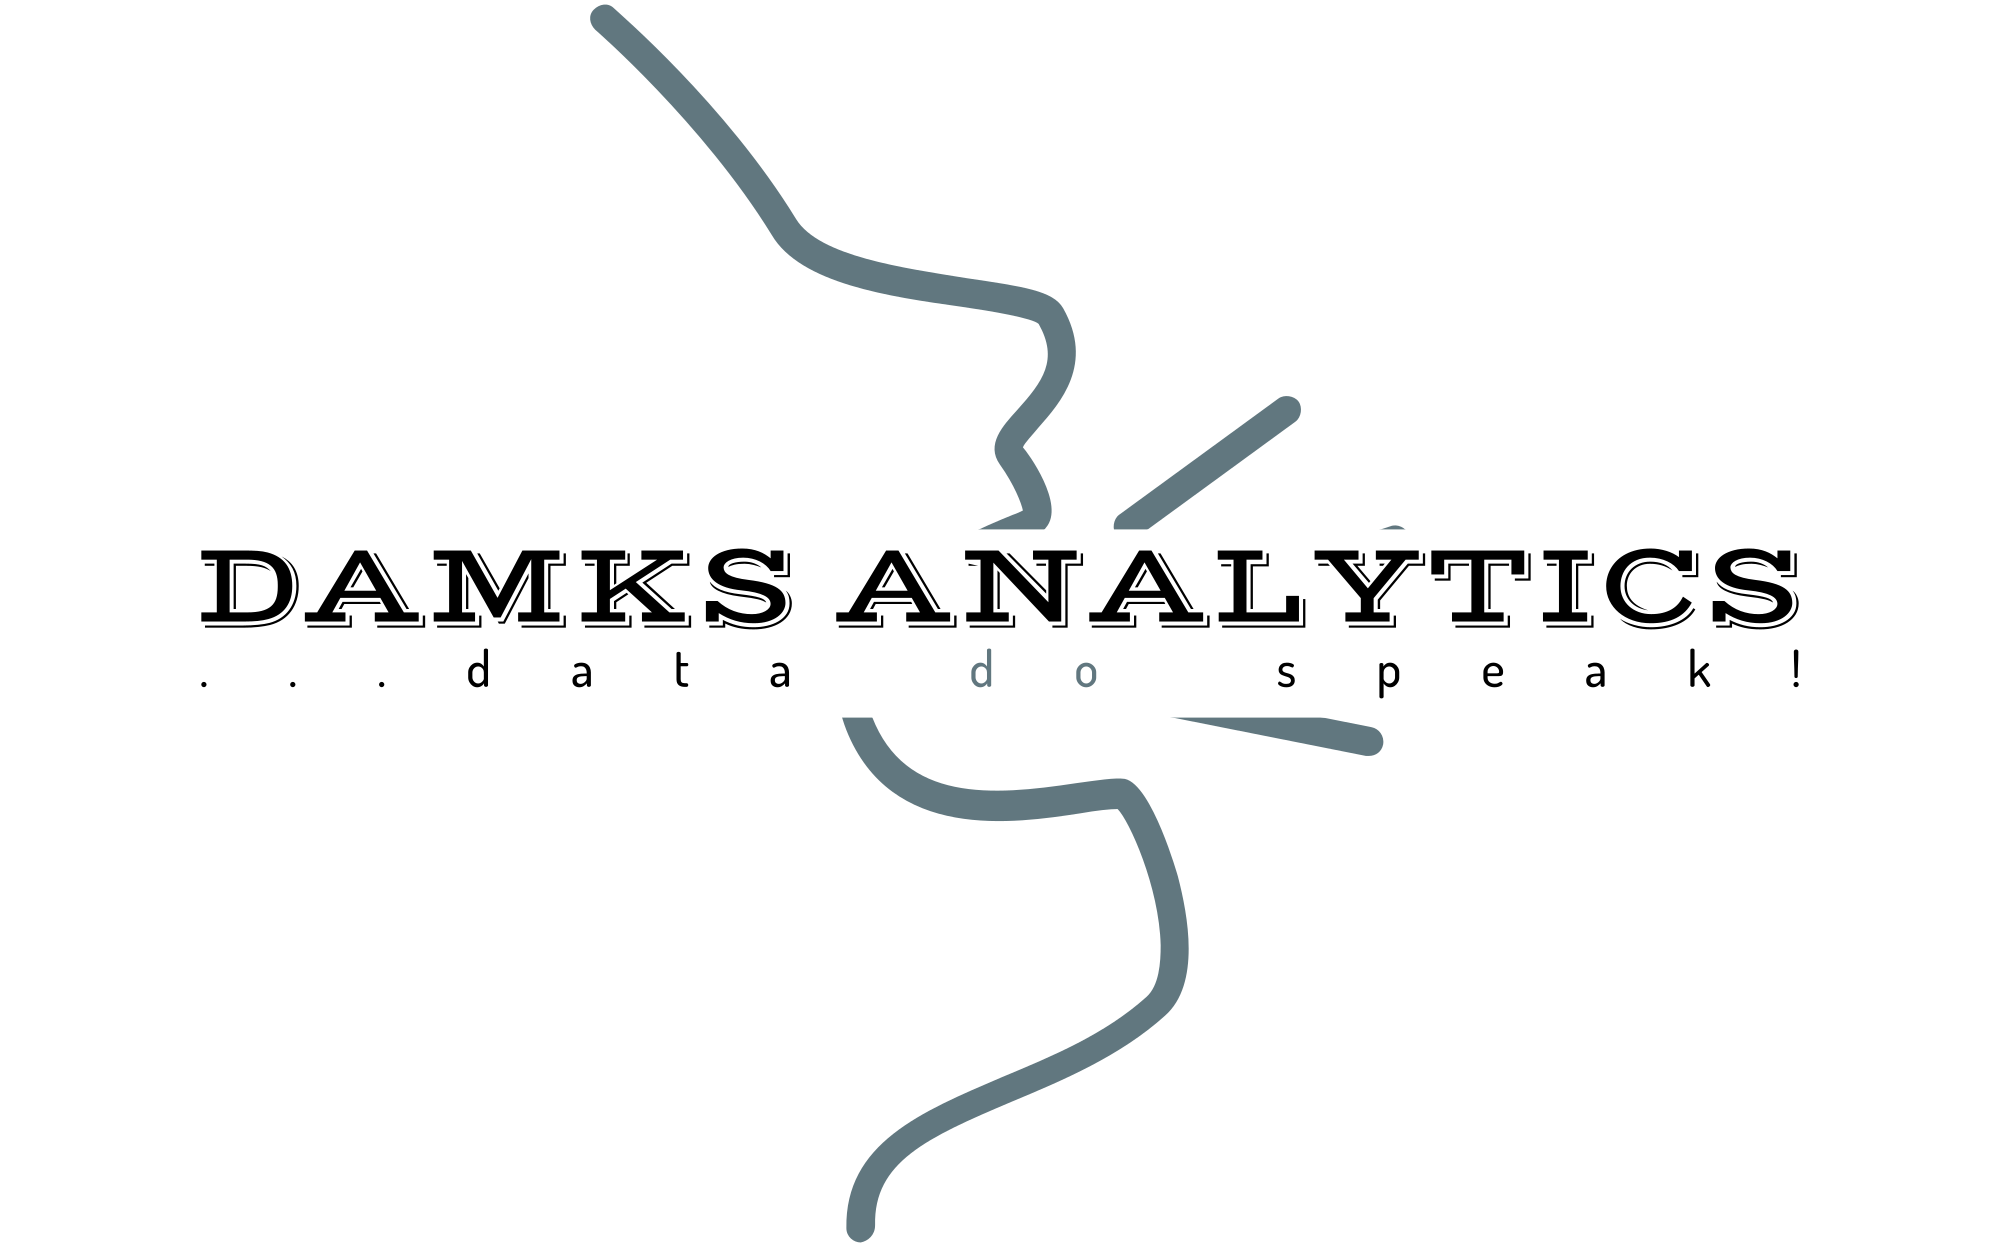